In [0]:
import pandas as pd
import numpy as np

In [0]:
## THis is test  

In [0]:
mba_salary_df=pd.read_csv('Data/MBA Salary.csv')

In [0]:
mba_salary_df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [0]:
import statsmodels.api as sm

In [0]:
X=sm.add_constant(mba_salary_df['Percentage in Grade 10'])
Y=mba_salary_df['Salary']

C:\Users\avelani\AppData\Local\Continuum\anaconda3\envs\DeepGPU\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_X,test_X,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=100)

In [0]:
mba_salary_lm=sm.OLS(train_y,train_X).fit()

In [0]:
print(mba_salary_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Fri, 24 Jan 2020   Prob (F-statistic):            0.00287
Time:                        18:38:02   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.05

In [0]:
## Checking Residual 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [0]:
mba_salary_resid=mba_salary_lm.resid

<Figure size 576x432 with 0 Axes>

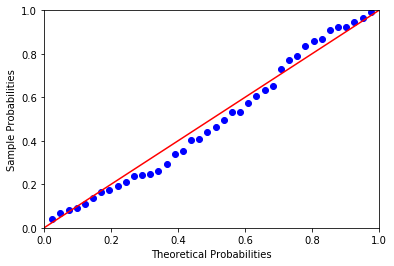

In [0]:
probPlot = sm.ProbPlot(mba_salary_resid)

plt.figure(figsize=(8,6))
probPlot.ppplot(line='45')
plt.show()

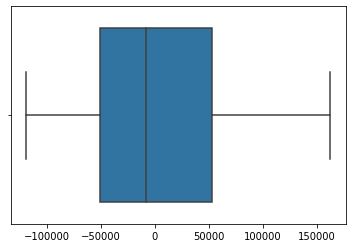

In [0]:
sn.boxplot(mba_salary_resid)

In [0]:
### Checking for Homoscadacity
# Formulla 
# Num - Num.mean()/ std(Num)

def get_standard_value(num):
    return (num-num.mean())/num.std()

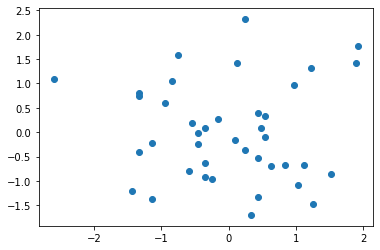

In [0]:
plt.scatter(get_standard_value(mba_salary_lm.fittedvalues),get_standard_value(mba_salary_lm.resid))

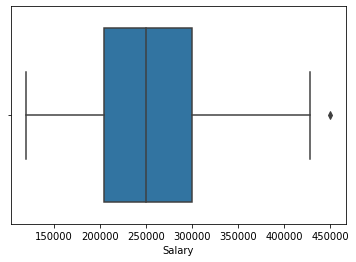

In [0]:
## Outlier 
sn.boxplot(mba_salary_df.Salary)


In [0]:
# Z-Score
from scipy.stats import zscoreore

In [0]:
mba_salary_df['z_score_salary']=zscore(mba_salary_df.Salary)

In [0]:
mba_salary_df[(mba_salary_df.z_score_salary>3.0)|(mba_salary_df.z_score_salary<-3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [0]:
# Using Leverage Value Or Influence Plot

from statsmodels.graphics.regressionplots import influence_plot

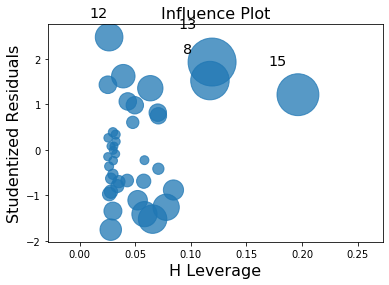

In [0]:
#fig,aux=plt.subplots(figsize=(8,6))
influence_plot(mba_salary_lm)
plt.show()

In [0]:
# Calculate Prediction Interval

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [0]:
pred_y = mba_salary_lm.predict(test_X)

In [0]:
wls_prediction_std(mba_salary_lm,test_X,alpha=0.1)

(array([72035.49885795, 71846.84741458, 72829.30248119, 71944.10482994,
        72709.53362778, 71741.81781609, 72310.46293586, 73467.60789736,
        71678.26566477, 72690.84742484]),
 array([158379.83204378, 151576.71501995,  92950.94239516, 115806.86961836,
        173266.08334187, 126117.5609831 , 104507.44438799, 184450.06048787,
        134057.99925822, 172941.52869074]),
 array([401276.97286011, 393837.74035249, 338524.71672566, 358395.83809682,
        418436.0080078 , 368024.43607611, 348331.73903001, 432176.14254184,
        375750.58228559, 418048.44518236]))

In [0]:
# Prediction Interval for Model

In [0]:
from scipy import stats
stats.norm.interval(0.95,loc=mba_salary_df.Salary.mean(),scale=mba_salary_df.Salary.std())

(107831.81260727957, 408552.1873927204)